In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import tensorflow as tf
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.model_selection import train_test_split
torch.manual_seed(0)
rd.seed(42)

In [12]:
inputs1 = torch.randn((48,2),requires_grad=True)
scalar1 = torch.Tensor([3.0,3.0])
# print(inputs1)
inputs1 = torch.sub(inputs1,scalar1)

inputs2 = torch.randn((52,2),requires_grad=True)
scalar2 = torch.Tensor([-3.0,-3.0])
inputs2 = torch.sub(inputs2,scalar2)
# print(inputs2)
inputs3 = torch.randn((51,2),requires_grad=True)
scalar3 = torch.Tensor([-3.0,3.0])
inputs3 = torch.sub(inputs3,scalar3)
# print(inputs3)3
inputs4 = torch.randn((49,2),requires_grad=True)
scalar4 = torch.Tensor([3.0,-3.0])
inputs4 = torch.sub(inputs4,scalar4)
# print(inputs4)
inputs = torch.cat((inputs1,inputs2,inputs3,inputs4),0)
# print(inputs)
targets = torch.Tensor()
for i,inp in enumerate(inputs):
    if (inp[0]<0):
        if (inp[1]<0):
            t = torch.Tensor([1.0])
            targets = torch.cat((t,targets),0)
        else:
            t = torch.Tensor([0.0])
            targets = torch.cat((t,targets),0)
    else:
        if (inp[1]<0):
            t = torch.Tensor([0.0])
            targets = torch.cat((t,targets),0)
        else:
            t = torch.Tensor([1.0])
            targets = torch.cat((t,targets),0)
# print(targets)
# inputs1, test_inputs, targets1, test_targets = train_test_split(inputs, targets, test_size = 0.5)

In [4]:
inputs1 = torch.randn((48,2))
scalar1 = torch.Tensor([3.0,3.0])
# print(inputs1)
inputs1 = torch.sub(inputs1,scalar1)

inputs2 = torch.randn((52,2))
scalar2 = torch.Tensor([-3.0,-3.0])
inputs2 = torch.sub(inputs2,scalar2)
# print(inputs2)
inputs3 = torch.randn((51,2))
scalar3 = torch.Tensor([-3.0,3.0])
inputs3 = torch.sub(inputs3,scalar3)
# print(inputs3)3
inputs4 = torch.randn((49,2))
scalar4 = torch.Tensor([3.0,-3.0])
inputs4 = torch.sub(inputs4,scalar4)
# print(inputs4)
test_inputs = torch.cat((inputs1,inputs2,inputs3,inputs4),0)
# print(inputs)
test_targets = torch.Tensor()
for i,inp in enumerate(inputs):
    if (inp[0]<0):
        if (inp[1]<0):
            t = torch.Tensor([1.0])
            test_targets = torch.cat((t,test_targets),0)
        else:
            t = torch.Tensor([0.0])
            test_targets = torch.cat((t,test_targets),0)
    else:
        if (inp[1]<0):
            t = torch.Tensor([0.0])
            test_targets = torch.cat((t,test_targets),0)
        else:
            t = torch.Tensor([1.0])
            test_targets = torch.cat((t,test_targets),0)
# print(targets)

MLP

In [13]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 7),
      nn.ReLU(),
      nn.Linear(7, 8),
      nn.ReLU(),
      nn.Linear(8, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
model1 = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.1)

for epoch in range(100):
    # Forward pass
    outputs = model1(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets.view(-1,1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    # Update the weights
    optimizer.step()
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.7196965217590332
Epoch 10, Loss: 0.6336925029754639
Epoch 20, Loss: 0.5372162461280823
Epoch 30, Loss: 0.4162166714668274
Epoch 40, Loss: 0.30374687910079956
Epoch 50, Loss: 0.1992083340883255
Epoch 60, Loss: 0.12039410322904587
Epoch 70, Loss: 0.07761809229850769
Epoch 80, Loss: 0.05492585152387619
Epoch 90, Loss: 0.04177745431661606


In [14]:
outputs = model1(test_inputs)
correct = 0 
for i, input in enumerate(outputs):
    if outputs[i]<0.5 and test_targets[i]==0:
        correct+=1
    elif outputs[i]>=0.5 and test_targets[i]==1:
        correct+=1
print('Test Accuracy of the model on the 200: {} %'.format(100 * correct / 200))

Test Accuracy of the model on the 200: 98.5 %


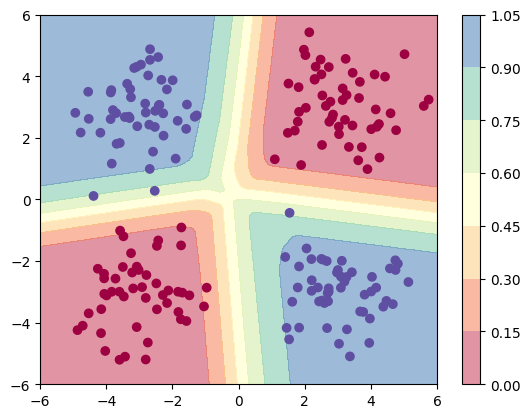

In [15]:
# Predict with the model


def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1).reshape(-1, 2)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(inputs[:, 0].detach().numpy(), inputs[:, 1].detach().numpy(),c=targets, cmap=plt.cm.Spectral)
    
predict_plot_grid(model1)

MLP with L1

In [16]:
from sklearn.metrics import accuracy_score

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 7),
      nn.ReLU(),
      nn.Linear(7, 8),
      nn.ReLU(),
      nn.Linear(8, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
model2 = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.1)

X_val, X_test, y_val, y_test = train_test_split(inputs, targets, test_size=0.5, random_state=42)

def train_evaluate_model(alpha, X_train, y_train, X_val, y_val):
  model = MLP()
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=alpha)  # Set weight decay as alpha for L1 regularization

  num_epochs = 50
  for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float)
    labels = torch.tensor(y_train, dtype=torch.float)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs,labels.view(-1,1))
    loss.backward()
    optimizer.step()
  with torch.no_grad():
    val_inputs = torch.tensor(X_val, dtype=torch.float)
    val_labels = torch.tensor(y_val, dtype=torch.float)
    val_outputs = model(val_inputs)
    val_loss = criterion(val_outputs, val_labels.view(-1,1))
    val_predictions = torch.argmax(val_outputs, dim=1)
    val_accuracy = accuracy_score(y_val, val_predictions.numpy())

  return val_loss.item(), val_accuracy

alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

best_alpha = None
best_val_accuracy = 0.0

for alpha in alpha_values:
  val_loss, val_accuracy = train_evaluate_model(alpha, inputs, targets, X_val, y_val)
  print(f"Alpha: {alpha}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

  if val_accuracy > best_val_accuracy:
    best_val_accuracy = val_accuracy
    best_alpha = alpha

print(f"Best alpha: {best_alpha}, Best Validation Accuracy: {best_val_accuracy}")



Alpha: 0.001, Validation Loss: 0.6964181661605835, Validation Accuracy: 0.49
Alpha: 0.01, Validation Loss: 0.5927321910858154, Validation Accuracy: 0.49
Alpha: 0.1, Validation Loss: 0.6869968175888062, Validation Accuracy: 0.49
Alpha: 1.0, Validation Loss: 0.6857389211654663, Validation Accuracy: 0.49
Alpha: 10.0, Validation Loss: 0.6931473612785339, Validation Accuracy: 0.49
Best alpha: 0.001, Best Validation Accuracy: 0.49


/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/705776182.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train, dtype=torch.float)
/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/705776182.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train, dtype=torch.float)
/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/705776182.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_inputs = torch.tensor(X_val, dtype=torch.float)
/var/fol

In [17]:
for epoch in range(1000):
    # Forward pass
    outputs = model2(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets.view(-1,1))
    
    # Zero the gradients
    optimizer.zero_grad()
    l1_coeff = 0.001
    l1_reg  = 0
    for parameter in model2.parameters():
        l1_reg +=  parameter.norm(1)
    # Backward pass
    loss += l1_coeff * l1_reg
    loss.backward()
    # Update the weights
    optimizer.step()
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.7166820168495178
Epoch 10, Loss: 0.6537471413612366
Epoch 20, Loss: 0.5868755578994751
Epoch 30, Loss: 0.48898428678512573
Epoch 40, Loss: 0.382066547870636
Epoch 50, Loss: 0.2975996732711792
Epoch 60, Loss: 0.24120014905929565
Epoch 70, Loss: 0.2032131552696228
Epoch 80, Loss: 0.17716017365455627
Epoch 90, Loss: 0.1575251668691635
Epoch 100, Loss: 0.1421653777360916
Epoch 110, Loss: 0.12984056770801544
Epoch 120, Loss: 0.11964823305606842
Epoch 130, Loss: 0.11105609685182571
Epoch 140, Loss: 0.1037188395857811
Epoch 150, Loss: 0.09746378660202026
Epoch 160, Loss: 0.09208840131759644
Epoch 170, Loss: 0.08741465210914612
Epoch 180, Loss: 0.0833362489938736
Epoch 190, Loss: 0.079758420586586
Epoch 200, Loss: 0.07660521566867828
Epoch 210, Loss: 0.07382404804229736
Epoch 220, Loss: 0.07137475907802582
Epoch 230, Loss: 0.06919161975383759
Epoch 240, Loss: 0.06724976003170013
Epoch 250, Loss: 0.06550735235214233
Epoch 260, Loss: 0.06393636763095856
Epoch 270, Loss: 0.062509

In [18]:
outputs = model2(test_inputs)
correct = 0 

# outputs = F.softmax(model1(inputs), dim=-1).detach().numpy()
for i, input in enumerate(outputs):
    if outputs[i]<0.5 and test_targets[i]==0:
        correct+=1
    elif outputs[i]>=0.5 and test_targets[i]==1:
        correct+=1
print('Test Accuracy of the model on the 200 test: {} %'.format(100 * correct / 200))

Test Accuracy of the model on the 200 test: 99.5 %


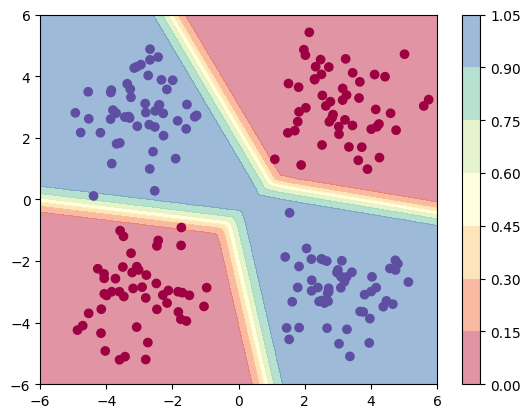

In [19]:
# Predict with the model
    
predict_plot_grid(model2)

MLP with L2

In [20]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 15),
      nn.ReLU(),
      nn.Linear(15, 10),
      nn.ReLU(),
      nn.Linear(10, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
model3 = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.1)

X_val, X_test, y_val, y_test = train_test_split(inputs, targets, test_size=0.5, random_state=42)

def train_evaluate_model(alpha, X_train, y_train, X_val, y_val):
  model = MLP()
  criterion = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=alpha)  # Set weight decay as alpha for L1 regularization

  num_epochs = 50
  for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float)
    labels = torch.tensor(y_train, dtype=torch.float)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs,labels.view(-1,1))
    loss.backward()
    optimizer.step()
  with torch.no_grad():
    val_inputs = torch.tensor(X_val, dtype=torch.float)
    val_labels = torch.tensor(y_val, dtype=torch.float)
    val_outputs = model(val_inputs)
    val_loss = criterion(val_outputs, val_labels.view(-1,1))
    val_predictions = torch.argmax(val_outputs, dim=1)
    val_accuracy = accuracy_score(y_val, val_predictions.numpy())

  return val_loss.item(), val_accuracy

alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

best_alpha = None
best_val_accuracy = 0.0

for alpha in alpha_values:
  val_loss, val_accuracy = train_evaluate_model(alpha, inputs, targets, X_val, y_val)
  print(f"Alpha: {alpha}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

  if val_accuracy > best_val_accuracy:
    best_val_accuracy = val_accuracy
    best_alpha = alpha

print(f"Best alpha: {best_alpha}, Best Validation Accuracy: {best_val_accuracy}")




Alpha: 0.001, Validation Loss: 0.5787031054496765, Validation Accuracy: 0.49
Alpha: 0.01, Validation Loss: 0.6263992786407471, Validation Accuracy: 0.49
Alpha: 0.1, Validation Loss: 0.6266546249389648, Validation Accuracy: 0.49
Alpha: 1.0, Validation Loss: 0.6893413066864014, Validation Accuracy: 0.49
Alpha: 10.0, Validation Loss: 0.6931564807891846, Validation Accuracy: 0.49
Best alpha: 0.001, Best Validation Accuracy: 0.49


/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/2025425246.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train, dtype=torch.float)
/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/2025425246.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train, dtype=torch.float)
/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/2025425246.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_inputs = torch.tensor(X_val, dtype=torch.float)
/var/

In [23]:
for epoch in range(100):
    # Forward pass
    outputs = model3(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets.view(-1,1))
    
    # Zero the gradients
    optimizer.zero_grad()
    l2_coeff = 0.001
    l2_reg  = 0
    for parameter in model3.parameters():
        l2_reg +=  parameter.norm(2)
    # Backward pass
    loss += l2_coeff * l2_reg
    loss.backward()
    # Update the weights
    optimizer.step()
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.12804369628429413
Epoch 10, Loss: 0.10808756947517395
Epoch 20, Loss: 0.08936481922864914
Epoch 30, Loss: 0.07301759719848633
Epoch 40, Loss: 0.06009996682405472
Epoch 50, Loss: 0.050482865422964096
Epoch 60, Loss: 0.043494731187820435
Epoch 70, Loss: 0.03840947151184082
Epoch 80, Loss: 0.03462351858615875
Epoch 90, Loss: 0.03173985332250595


In [25]:
outputs = model3(test_inputs)
correct = 0 
for i, input in enumerate(outputs):
    if outputs[i]<0.5 and test_targets[i]==0:
        correct+=1
    elif outputs[i]>=0.5 and test_targets[i]==1:
        correct+=1
print('Test Accuracy of the model on the 200: {} %'.format(100 * correct / 200))

Test Accuracy of the model on the 200: 98.0 %


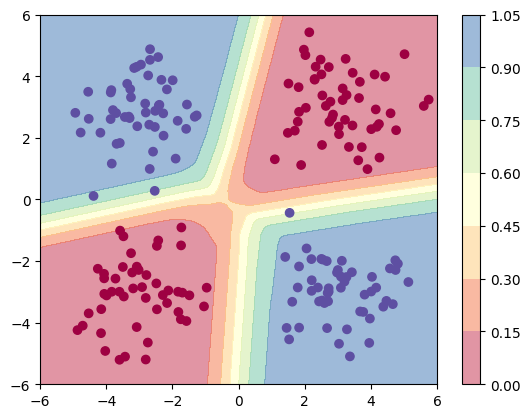

In [26]:
# Predict with the model
    
predict_plot_grid(model3)

Logistic Regression

In [27]:
class Logistic_Regression(nn.Module):
    def __init__(self, input_dim):
        super(Logistic_Regression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits

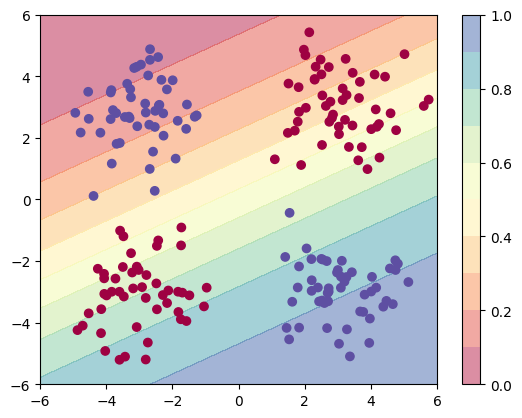

In [28]:
# Predict with the model
def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid.reshape(-1, 2))
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(inputs[:, 0].detach().numpy(), inputs[:, 1].detach().numpy(),c=targets, cmap=plt.cm.Spectral)

log_reg = Logistic_Regression(2)
predict_plot_grid(log_reg)

0 0.7430369853973389
converged


/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/3563188978.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(inputs, dtype=torch.float32)
/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/3563188978.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets)


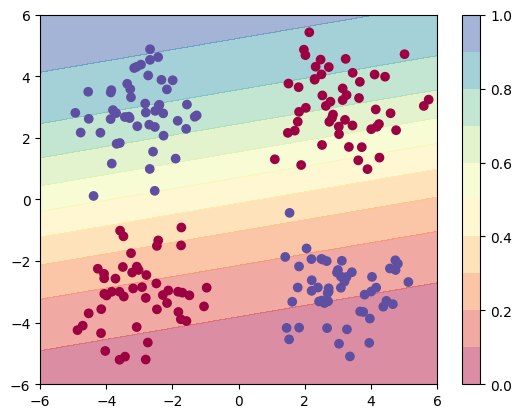

In [29]:
opt = torch.optim.Adam(log_reg.parameters(), lr=0.1)
# log_reg = LogisticRegression(2)
# inputs = inputs.detach().numpy()
# inputs = np.concatenate([inputs, inputs[:,[0]]*inputs[:,[1]], inputs[:, [0]]**2, inputs[:, [1]]**2], axis=-1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

X_tensor = torch.tensor(inputs, dtype=torch.float32)

# print(X_tensor.shape)

log_reg= Logistic_Regression(2)


opt = torch.optim.Adam(log_reg.parameters(), lr=0.1)

converged = False

targets = torch.tensor(targets)

targets = targets.type(torch.LongTensor)

prev_loss = 1e8

F = nn.CrossEntropyLoss()

i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg(X_tensor)
    # print(targets)
    logits = logits.detach().numpy()
    prob = sigmoid(logits)
    other_prob = 1 - prob
    p = np.hstack((other_prob, prob))
    p = torch.tensor(p, requires_grad=True)
    loss = F(p, targets)
    # loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(targets, dtype=torch.float32).view(-1, 1))
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-9:
        converged = True 
        print("converged")
    prev_loss = loss.item() 
    i = i + 1



predict_plot_grid(log_reg)

In [30]:
inputs_ = inputs.detach().numpy()
inputs_ = np.concatenate([inputs_, inputs_[:,[0]]*inputs_[:,[1]]], axis=-1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

X_tensor = torch.tensor(inputs_, dtype=torch.float32)

# print(X_tensor.shape)

log_reg5= Logistic_Regression(3)


opt = torch.optim.Adam(log_reg.parameters(), lr=0.1)

converged = False

targets = torch.tensor(targets)

targets = targets.type(torch.LongTensor)

prev_loss = 1e8

F = nn.CrossEntropyLoss()

i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg5(X_tensor)
    # print(targets)
    logits = logits.detach().numpy()
    prob = sigmoid(logits)
    other_prob = 1 - prob
    p = np.hstack((other_prob, prob))
    p = torch.tensor(p, requires_grad=True)
    loss = F(p, targets)
    loss.backward()
    opt.step()
    print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-9:
        converged = True 
        print("converged")
    prev_loss = loss.item() 
    i = i + 1

0 0.3719075918197632
1 0.3719075918197632
converged


/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_46409/2910265432.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets)


(10000, 3)


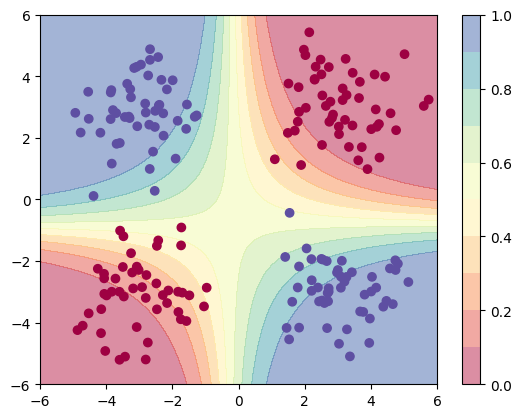

In [31]:
def predict_plot_grid_5(model):
    XX, YY = torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    inputs_ = X_grid.detach().numpy().reshape(10000, 2)
    inputs_ = np.concatenate([inputs_, inputs_[:,[0]]*inputs_[:,[1]]], axis=-1)
    print(inputs_.shape)
    X_grid = torch.tensor(inputs_)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(inputs[:, 0].detach().numpy(), inputs[:, 1].detach().numpy(),c=targets, cmap=plt.cm.Spectral)

predict_plot_grid_5(log_reg5)

In [38]:
from sklearn.linear_model import LogisticRegression

log_regg = LogisticRegression()
log_regg.fit(inputs_,targets.T)

LogisticRegression()

In [40]:
test_inputs = np.concatenate([test_inputs, test_inputs[:,[0]]*test_inputs[:,[1]]], axis=-1)
predicted_labels = log_regg.predict(test_inputs)
true_labels = test_targets


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy*100)

Accuracy: 98.5


Comments: 
Without regularization, MLPs can sometimes overfit the training data, leading to poor generalization on unseen data. L1 regularization encourages sparsity in model weights, which can help in feature selection and simplification of the model. L1 regularization can lead to more sparse weights compared to L2 regularization. L2 regularization penalizes large weights, which helps in preventing overfitting by keeping the model weights closer to zero. Logistic regression is a simple linear model used for binary classification tasks. It can struggle when only 2 features are taken but in case of x1*x2 taken, it will perform well on XOR dataset. 